In [7]:
import numpy as np
import matplotlib.pyplot as plt

import string
import copy

from models import ContinuousIncrementalRSA
from utils import *
import time
from tqdm import tqdm

import scipy.stats

## Vary the number of duplicates of an object in the reference context

In [8]:
adjectives = ["red", "blue", "green"]
nouns = ["pin", "dress", "truck"]
objects = get_all_objects(adjectives, nouns)
utterances = get_all_utterances(adjectives, nouns)
objects

[{'color': 'red', 'shape': 'pin', 'string': 'red pin'},
 {'color': 'red', 'shape': 'dress', 'string': 'red dress'},
 {'color': 'red', 'shape': 'truck', 'string': 'red truck'},
 {'color': 'blue', 'shape': 'pin', 'string': 'blue pin'},
 {'color': 'blue', 'shape': 'dress', 'string': 'blue dress'},
 {'color': 'blue', 'shape': 'truck', 'string': 'blue truck'},
 {'color': 'green', 'shape': 'pin', 'string': 'green pin'},
 {'color': 'green', 'shape': 'dress', 'string': 'green dress'},
 {'color': 'green', 'shape': 'truck', 'string': 'green truck'}]

In [28]:
red_pin = []
blue_pin = []
red_dress = []
green_truck = []

for num_duplicates in range(10):
    objects_copy = copy.deepcopy(objects)
    for _ in range(num_duplicates):
        objects_copy.append({'color': 'red', 'shape': 'pin', 'string': 'red pin'})
    print('Num duplicates', num_duplicates)
    rsa = ContinuousIncrementalRSA(adjectives=adjectives,
                                    nouns=nouns,
                                    objects=objects_copy,
                                    utterances=utterances,
                                )
    red_pin_probs = []
    for utt in ['red', 'pin', 'red pin', 'pin red']:
        probs = rsa.incremental_pragmatic_speaker({'color': 'red', 'shape': 'pin', 'string': 'red pin'}, utt)
        red_pin_probs.append(probs)
    red_pin.append(red_pin_probs)
    
    blue_pin_probs = []
    for utt in ['blue', 'pin', 'blue pin', 'pin blue']:
        probs = rsa.incremental_pragmatic_speaker({'color': 'blue', 'shape': 'pin', 'string': 'blue pin'}, utt)
        blue_pin_probs.append(probs)
    blue_pin.append(blue_pin_probs)
        
    red_dress_probs = []
    for utt in ['red', 'dress', 'red dress', 'dress red']:
        probs = rsa.incremental_pragmatic_speaker({'color': 'red', 'shape': 'dress', 'string': 'red dress'}, utt)
        red_dress_probs.append(probs)
    red_dress.append(red_dress_probs)
    
    green_truck_probs = []
    for utt in ['green', 'truck', 'green truck', 'truck green']:
        probs = rsa.incremental_pragmatic_speaker({'color': 'green', 'shape': 'truck', 'string': 'green truck'}, utt)
        green_truck_probs.append(probs)
    green_truck.append(green_truck_probs)

Num duplicates 0
Num duplicates 1
Num duplicates 2
Num duplicates 3
Num duplicates 4
Num duplicates 5
Num duplicates 6
Num duplicates 7
Num duplicates 8
Num duplicates 9


/var/folders/wh/tk6j12kd7jq5djbxfn93wjdm0000gn/T/ipykernel_68859/1284570352.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['adj', 'noun', 'adj-noun', 'noun-adj'], rotation=60)


Text(0.5, 0.98, 'red pin')

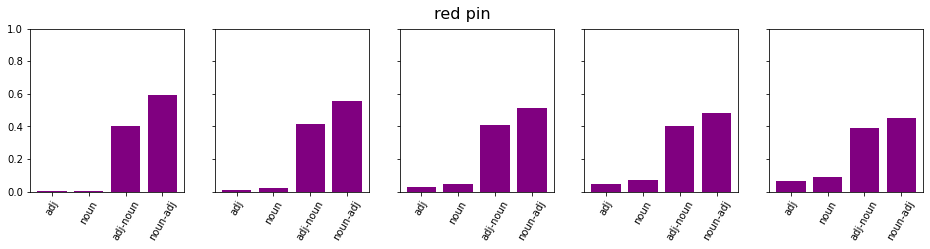

In [39]:
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(16, 3))
for i, ax in enumerate(axs):
    ax.bar(['adj', 'noun', 'adj-noun', 'noun-adj'], red_pin[i], color='purple')
    ax.set_xticklabels(['adj', 'noun', 'adj-noun', 'noun-adj'], rotation=60)
    ax.set_ylim([0, 1])

fig.suptitle('red pin', size=16)

/var/folders/wh/tk6j12kd7jq5djbxfn93wjdm0000gn/T/ipykernel_68859/244230473.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['adj', 'noun', 'adj-noun', 'noun-adj'], rotation=60)


Text(0.5, 0.98, 'blue pin')

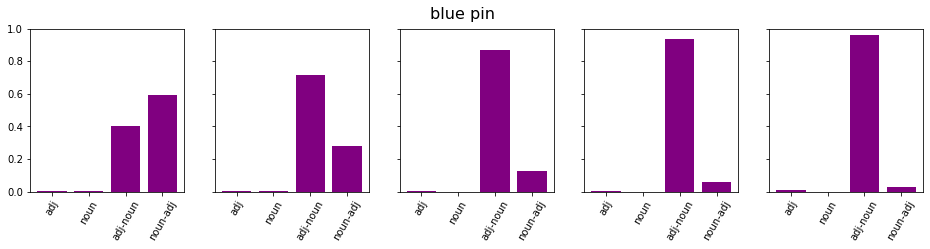

In [40]:
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(16, 3))
for i, ax in enumerate(axs):
    ax.bar(['adj', 'noun', 'adj-noun', 'noun-adj'], blue_pin[i], color='purple')
    ax.set_xticklabels(['adj', 'noun', 'adj-noun', 'noun-adj'], rotation=60)
    ax.set_ylim([0, 1])

fig.suptitle('blue pin', size=16)

0
1
2
3


/var/folders/wh/tk6j12kd7jq5djbxfn93wjdm0000gn/T/ipykernel_68859/1565726120.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  row_ax.set_xticklabels(x_labels, rotation=60)


Text(0.5, 0.98, 'Prob. of postnominal ordering varying the number of duplicates of red pin')

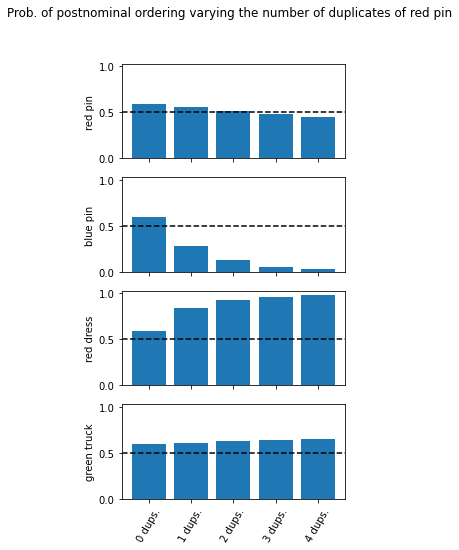

In [75]:
all_probs = [np.array(red_pin), np.array(blue_pin), np.array(red_dress), np.array(green_truck)]
y_labels = ['red pin', 'blue pin', 'red dress', 'green truck']
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(4, 8))
for obj_idx, row_ax in enumerate(axs):
    print(obj_idx)
    vals_for_hist = all_probs[obj_idx][:5, -1]
    x_labels = [str(i) + ' dups.' for i in range(5)]
    row_ax.bar(x_labels, vals_for_hist)
    row_ax.axhline(y=0.5, ls='--', c='black', zorder=1)
    row_ax.set_xticklabels(x_labels, rotation=60)
    row_ax.set_ylabel(y_labels[obj_idx])
    #for dup_idx, item_ax in enumerate(row_ax):
    #    item_ax.bar(['adj', 'noun', 'adj-noun', 'noun-adj'], all_probs[obj_idx][dup_idx], color='purple')
    #    item_ax.set_xticklabels(['adj', 'noun', 'adj-noun', 'noun-adj'], rotation=60)
    #    item_ax.set_ylim([0, 1])
    #    item_ax.set_xlabel(str(dup_idx) + ' duplicates')
    #    if dup_idx == 0:
    #        item_ax.set_ylabel(y_labels[obj_idx])

fig.suptitle('Prob. of postnominal ordering varying the number of duplicates of red pin')

In [ ]:
rsa = ContinuousIncrementalRSA(adjectives=adjectives,
                                  nouns=nouns,
                                  objects=objects,
                                  utterances=utterances
                              )
for utt in ['red', 'pin', 'red pin', 'pin red']:
    probs = rsa.incremental_pragmatic_speaker({'color': 'red', 'shape': 'pin', 'string': 'red pin'}, utt)
    print(probs)